# Доверительные интервалы для доли 

## Генерация данных

In [1]:
import numpy as np

In [3]:
np.random.seed(1)

statistical_population = np \
                         .random.randint(2, size = 100_000) 

In [4]:
# отобрать выборку из нашей генеральной совокупности
random_sample = np \
                .random.choice(statistical_population, size = 1_000)

In [5]:
#истинное значение доли
statistical_population.mean()

0.49771

## Точечная оценка доли

In [6]:
# самая лучшая оценка среднего - это выборочное среднее

# Эта оценка является:
# - несмещенной
# - асимптотически нормальной
# - эффективной

random_sample.mean()

0.502

Однако часто такой оценки недостаточно. Например, в тех случаях, когда мы хотим знать, в каких диапазонах меняется настоящая доля, то есть какое минимальное и максимальное значение на нашу оценку среднего. Вот для того чтобы такую оценку получить, нужно построить доверительный интервал на среднее.

## Доверительный интервал для доли

In [7]:
from statsmodels.stats.proportion import proportion_confint

### Доверительный интервал на основе нормального распределения

Чаще всего доверительные интервалы строятся на основе нормального распределения с использованием центральной предельной теоремы. Формула прямо перед вами.

Давайте и мы начнем с этого. Для того чтобы такие интервалы получить, мы будем использовать функцию `proportion confint`. Она принимает несколько аргументов. Первый аргумент — это количество успехов в нашей подвыборке. Второй аргумент — это количество событий, то есть размер нашей подвыборки. И метод, с помощью которого мы хотим это оценивать.

Мы работаем с нормальным распределением, поэтому и пишем метод normal. Итак, давайте построим интервал, очень просто. И теперь давайте выведем заданные границы на экран. Помимо самих границ интервала нас также будет интересовать его ширина. Понятно, это довольно важная характеристика, потому что чем уже получился наш интервал, тем более точную оценку диапазона мы с вами получили. Давайте посмотрим. Видим, что интервал получился неплохой. Помним, наше настоящее среднее 0,498, оно в этот интервал попадает. Ширина интервала 0,06 — в общем-то, довольно узкий интервал.

$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

In [8]:
normal_interval = proportion_confint(sum(random_sample),
                                     len(random_sample),
                                     method = 'normal')

In [29]:
proportion_confint(0.07 * 100_000,
                   100_000,
                   method = 'normal')

(0.06841861146701013, 0.07158138853298988)

In [17]:
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.471010, 0.532990] with width 0.061979


### Доверительный интервал Уилсона

Следующий метод, который очень часто используют, это доверительный интервал Уилсона. Это некоторое улучшение предыдущего метода, которое позволяет получать качественные оценки в крайних случаях. То есть тогда, когда наша доля очень близка к 0 или очень близка к 1. + когда у нас не так много событий.

Более того, этот интервал получается неплохим в случае, когда наша случайная подвыборка довольно мала, то есть включает в себя очень мало событий. Формула для расчета перед вами и давайте строить интервал. Это делается с помощью той же самой функции, видите, что первые два параметра не меняются. Однако нам нужно изменить метод, с помощью которого мы будем строить интервал.

В данном случае мы будем пользоваться методом `Уилсона`, поэтому давайте это явно напишем. Итак, получаем интервал. Теперь давайте выведем результаты на экран. И сравним с предыдущим. Видим, что наши границы практически не изменились, видим, что изменения у нас только в пятом знаке после запятой, ну и с данной точностью мы даже не можем увидеть разницу в ширине интервала, то есть фактически они одинаковые. Ну почему так получается? Здесь мы не видим явных преимуществ, потому что наша случайная подвыборка довольно хороша. Значение доли у нас не является крайним. Объектов целых событий, вернее целых 1000. Поэтому, в общем-то, мы и так можем довольно не плохо это оценить.

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{
z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [15]:
wilson_interval = proportion_confint(sum(random_sample),
                                     len(random_sample),
                                     method = 'wilson')

In [16]:
print('wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0]))

wilson_interval [0.471062, 0.532922] with width 0.061860


Теперь давайте посмотрим еще раз на ширину интервала. В данном случае наш интервал имеет ширину 0,6. Часто мы с вами можем хотеть задать некоторое ограничение на ширину интервала. Например, мы хотим знать более точную оценку и получить интервал меньшей ширины.

Таким образом, возникает вопрос: сколько же событий нам нужно знать для того, чтобы оценить долю с достаточной точностью?

## Размер выборки для интервала заданной ширины

Для того чтобы этот вопрос решить, существует очень удобный метод под названием `sample size confint proportion`.

Он позволяет нам явно задать ограничение на ширину нашего интервала и получить количество событий, которое необходимо для того, чтобы получить оценку заданной ширины. Вот давайте это сделаем.

Сначала импортируем нужную функциональность. И вот давайте для разнообразия получим интервал в 3 раза у́же, то есть интервал ширины 0,02. Для этого сначала указываем среднее выборочное по нашей выборке и давайте теперь укажем ширину интервала. На самом деле нам нужно указать половину ширины этого интервала для того, чтобы в дальнейшем получить интервал заданной ширины.

Вот давайте получим количество объектов n samples и сразу же на него посмотрим. Вот оказывается, что чтобы получить оценку заданной точности, то есть в 3 раза, чтобы получить ширину в 3 раза у́же, нам нужно взять почти в 10 раз больше событий.

In [18]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [30]:
n_samples = int(np.ceil(
                        samplesize_confint_proportion(random_sample.mean(),
                                                      0.01)
                       ))
n_samples

                        # выборка_ограниченная_пропорция -> указываем половину требуемого интервала

9602

Ну вот давайте это сделаем. Перегенерируем нашу случайную выборку, снова будем использовать метод `random choice`, однако теперь скажем, что количество объектов будет равняться переменной n samples – тому количеству, которое мы рассчитали шагом выше. Итак, перестраиваем выборку. Теперь давайте снова получим интервал на долю с помощью метода `proportion confint`.

Итак, получили наш интервал. И теперь смотрим, нас интересует, получился ли у нас интервал заданной ширины. Итак, мы видим, что все получилось. Интервал по-прежнему достаточно хороший. Наше истинное значение входит в заданный интервал и при этом он стал в 3 раза у́же. Мы получили оценку интервала шириной 0,002.

In [21]:
np.random.seed(1)
random_sample = np.random.choice(statistical_population, size = n_samples)

In [22]:
normal_interval = proportion_confint(sum(random_sample),
                                     len(random_sample),
                                     method = 'normal')

In [23]:
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1],
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.481776, 0.501773] with width 0.019997


# Доверительные интервалы для долей - Тест

## Вопрос 1

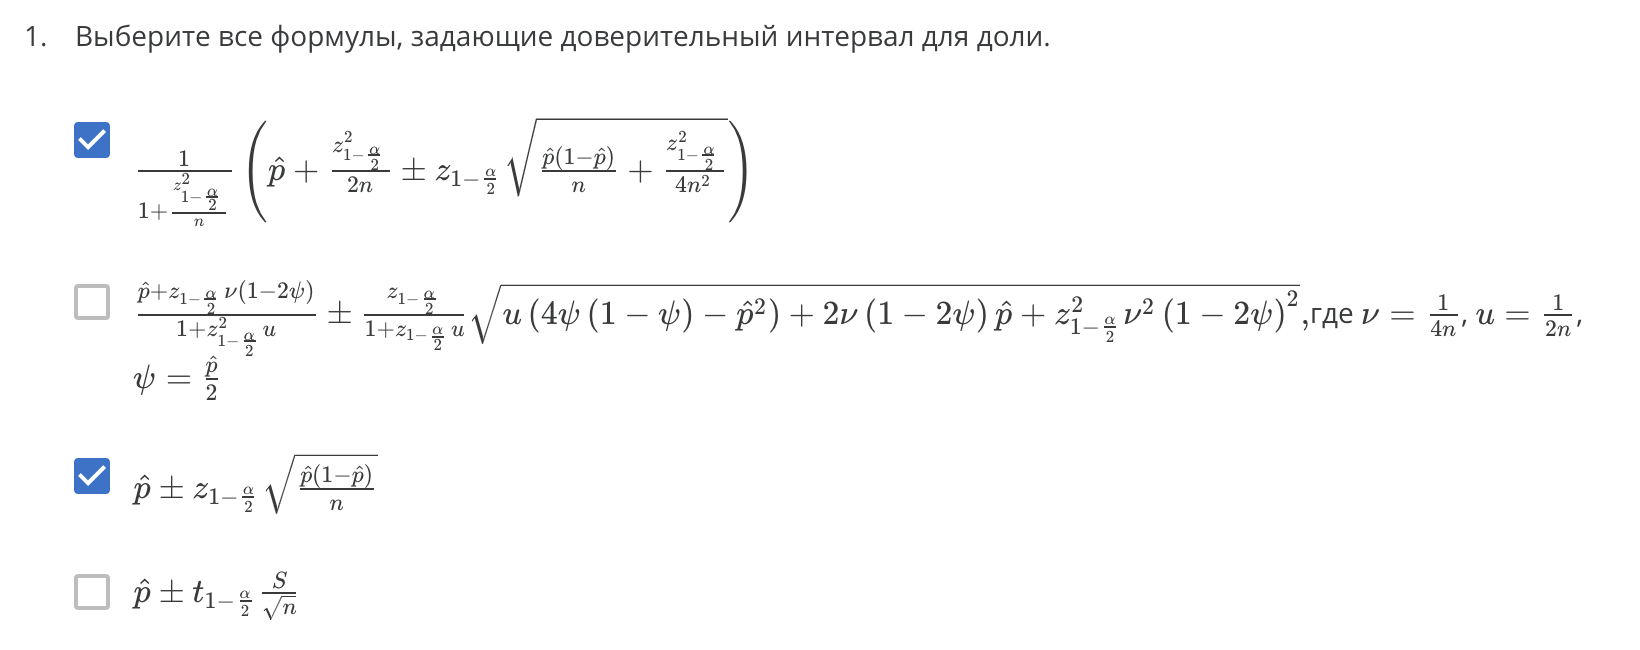

## Вопрос 2
Большая часть млекопитающих неспособны во взрослом возрасте переваривать лактозу, содержащуюся в молоке. У людей за расщепление лактозы отвечает фермент лактаза, кодируемый геном LCT. У людей с вариантом 13910T этого гена лактаза продолжает функционировать на протяжении всей жизни. Распределение этого варианта гена сильно варьируется в различных генетических популяциях.

Из 50 исследованных представителей народа майя вариант 13910T был обнаружен у одного. Постройте нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [92]:
proportion_confint(1,
                   50,
                   method = 'normal')

(0.0, 0.05880530708179099)

вопросы: а чем определяется 95% доверия интервала?

3.
Вопрос 3
В условиях предыдущей задачи постройте 95% доверительный интервал Уилсона для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [93]:
proportion_confint(1,
                   50,
                   method = 'wilson')

(0.003539259271646236, 0.10495443589637815)

### Правильно

In [94]:
from statsmodels.stats.proportion import proportion_confint
proportion_confint(1, 50, method = 'wilson')

(0.003539259271646236, 0.10495443589637815)

## Вопрос 4
Какой из двух построенных доверительных интервалов выглядит более вменяемым, учитывая, что параметр, для которого строится оценка, меняется от 0 до 1?

- нормальный

- Уилсона

## Вопрос 5
Пусть в популяции майя действительно 2% носителей варианта 13910T, как в выборке, которую мы исследовали. Какой объём выборки нужен, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью ±0.01 на уровне доверия 95%?

In [52]:
int(np.ceil(
                        samplesize_confint_proportion(0.02,
                                                      0.01)
                       ))

753

### правильное решение:

from statsmodels.stats.proportion import samplesize_confint_proportion

from math import ceil

ceil(samplesize_confint_proportion(1.0/50, 0.01, method='normal'))

In [77]:
from statsmodels.stats.proportion import samplesize_confint_proportion
from math import ceil
ceil(samplesize_confint_proportion(1.0/50, 0.01, method='normal'))

753

## Вопрос 6
Постройте график зависимости объёма выборки, необходимого для оценки для доли носителей гена 13910T с точностью \pm0.01±0.01 на уровне доверия 95%, от неизвестного параметра pp. Посмотрите, при каком значении pp нужно больше всего испытуемых. Как вы думаете, насколько вероятно, что выборка, которую мы анализируем, взята из случайной величины с этим значением параметра?

Как бы вы не ответили на последний вопрос, рассмотреть объём выборки, необходимый при таком pp, всё равно полезно — это даёт максимально пессимистичную оценку необходимого объёма выборки.

Какой объём выборки нужен в худшем случае, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью 0.01±0.01 на уровне доверия 95%?

In [70]:
x = 0
l = []
for i in range(1, 1001, 1):
    l.append(int(np.ceil(
                        samplesize_confint_proportion(0.001 * i,
                                                      0.01)
                       )))
k = zip(range(0,1001,1),l)

In [56]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

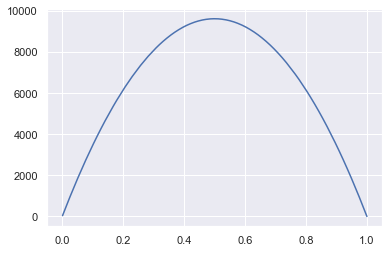

In [75]:
sns.lineplot(x=(0.001 * x for x in range(1,1001,1)), y=l)

In [72]:
samplesize_confint_proportion(0.001 * 500, 0.01)

9603.647051735317

### правильное решение:

from statsmodels.stats.proportion import samplesize_confint_proportion

from math import ceil

ceil(samplesize_confint_proportion(0.5, 0.01, method='normal'))

In [76]:
from statsmodels.stats.proportion import samplesize_confint_proportion
from math import ceil
ceil(samplesize_confint_proportion(0.5, 0.01, method='normal'))
# потолок

9604

# доп.расчеты

In [105]:
list(map(lambda x: round(x, 3),
         proportion_confint(60, 100, method = 'normal', alpha = 0.05)))

[0.504, 0.696]

In [104]:
list(map(lambda x: round(x, 3),
         proportion_confint(60, 100, method = 'wilson', alpha = 0.05)))

[0.502, 0.691]

In [102]:
list(map(lambda x: round(x, 3), proportion_confint(50,
                   100,
                   method = 'normal',
                   alpha = 0.05, 
                                                  )))

[0.402, 0.598]

In [108]:
list(map(lambda x: round(x, 3),
         proportion_confint(60, 100, method = 'wilson', alpha = 0.05)))

[0.502, 0.691]

In [107]:
list(map(lambda x: round(x, 3),
         proportion_confint(75, 100, method = 'wilson', alpha = 0.05)))

[0.657, 0.825]

In [110]:
list(map(lambda x: round(x, 3),
         proportion_confint(75 - 60, 100, method = 'normal', alpha = 0.05)))

[0.08, 0.22]